# Explore House Sales Data

Let's explore the house sales data.

In [1]:
# initialize Spark Session
import os
import sys
top_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
if top_dir not in sys.path:
    sys.path.append(top_dir)

from init_spark import init_spark
spark = init_spark()
spark

Initializing Spark...
Spark found in :  /Users/sujee/spark
Spark config:
	 spark.app.name=TestApp
	spark.master=local[*]
	executor.memory=2g
	spark.sql.warehouse.dir=/var/folders/lp/qm_skljd2hl4xtps5vw0tdgm0000gn/T/tmpbq5e0ty3
	some_property=some_value
Spark UI running on port 4040


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Step 1: Read and Display data

We will also start profiling out code.

#### 1.1 - Using perf_counter() for timing -- this is universal,  works on python and jupyter

In [3]:
import time

t1 = time.perf_counter()
house_prices = spark.read.csv("/data/house-prices/house-sales-simplified.csv", \
                              header=True, inferSchema=True)
t2 = time.perf_counter()
print("read {:,} records in {:,.2f} ms".format(house_prices.count(), (t2-t1)*1000))

read 27,063 records in 3,307.29 ms


#### 1.2 - using %%time magic function -- only works in Jupyter notebook

In [4]:
%%time
house_prices = spark.read.csv("/data/house-prices/house-sales-simplified.csv", \
                              header=True, inferSchema=True)

CPU times: user 1.98 ms, sys: 1.67 ms, total: 3.66 ms
Wall time: 263 ms


In [5]:
print ("number of records read ", house_prices.count())

number of records read  27063


## Step 2: See schema and data

In [6]:
house_prices.printSchema()
house_prices.show(10)

root
 |-- ID: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- SalePrice: integer (nullable = true)
 |-- PropertyID: long (nullable = true)
 |-- PropertyType: string (nullable = true)
 |-- Bedrooms: integer (nullable = true)
 |-- Bathrooms: double (nullable = true)
 |-- SqFtTotLiving: integer (nullable = true)
 |-- SqFtLot: integer (nullable = true)
 |-- YrBuilt: integer (nullable = true)
 |-- ZipCode: integer (nullable = true)

+---+-------+---------+----------+-------------+--------+---------+-------------+-------+-------+-------+
| ID|   Date|SalePrice|PropertyID| PropertyType|Bedrooms|Bathrooms|SqFtTotLiving|SqFtLot|YrBuilt|ZipCode|
+---+-------+---------+----------+-------------+--------+---------+-------------+-------+-------+-------+
|  1|9/16/14|   280000|   1000102|    Multiplex|       6|      3.0|         2400|   9373|   1991|  98002|
|  2|6/16/06|  1000000|   1200013|Single Family|       4|     3.75|         3764|  20156|   2005|  98166|
|  3|1/29/07|   745

## Step 3: 'Summary' of data

In [7]:
house_prices.describe().show()

## this output is hard to read. 

+-------+-----------------+------+-----------------+--------------------+------------+------------------+------------------+-----------------+------------------+------------------+-----------------+
|summary|               ID|  Date|        SalePrice|          PropertyID|PropertyType|          Bedrooms|         Bathrooms|    SqFtTotLiving|           SqFtLot|           YrBuilt|          ZipCode|
+-------+-----------------+------+-----------------+--------------------+------------+------------------+------------------+-----------------+------------------+------------------+-----------------+
|  count|            27063| 27063|            27063|               27063|       27063|             27063|             27063|            27063|             27063|             27063|            27063|
|   mean|          13532.0|  null|511626.2031186491| 4.680324882081883E9|        null|  3.38015002032295|2.2555518604737097|2122.963160033995|10997.679747256401|1977.0868713742009| 82223.0382440971|
| std

In [8]:
## convert 'describe' output to Pandas for better display
house_prices.describe().toPandas()

,summary,ID,Date,SalePrice,PropertyID,PropertyType,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
0,count,27063,27063,27063,27063,27063,27063,27063,27063,27063,27063,27063
1,mean,13532.0,None,511626.2031186491,4.680324882081883E9,None,3.38015002032295,2.2555518604737097,2122.963160033995,10997.679747256401,1977.0868713742009,82223.0382440971
2,stddev,7812.559503773396,None,342821.1687621066,2.8963509791501536E9,None,0.8954474026731043,0.7711908718098446,939.8394756826191,28110.662009221247,30.92149089181688,36106.66555930428
3,min,1,1/1/07,3000,1000102,Multiplex,0,0.0,370,494,1900,-1
4,max,27063,9/9/14,11000000,9906000035,Townhouse,33,8.0,10740,1024068,2016,98354


In [9]:
# you can also display vertically
house_prices.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,27063,13532.0,7812.559503773396,1,27063
Date,27063,None,None,1/1/07,9/9/14
SalePrice,27063,511626.2031186491,342821.1687621066,3000,11000000
PropertyID,27063,4.680324882081883E9,2.8963509791501536E9,1000102,9906000035
PropertyType,27063,None,None,Multiplex,Townhouse
Bedrooms,27063,3.38015002032295,0.8954474026731043,0,33
Bathrooms,27063,2.2555518604737097,0.7711908718098446,0.0,8.0
SqFtTotLiving,27063,2122.963160033995,939.8394756826191,370,10740
SqFtLot,27063,10997.679747256401,28110.662009221247,494,1024068


## Step 4: Get an idea of one or more attribute(s)

In [10]:
house_prices.describe("SalePrice").show()


+-------+-----------------+
|summary|        SalePrice|
+-------+-----------------+
|  count|            27063|
|   mean|511626.2031186491|
| stddev|342821.1687621066|
|    min|             3000|
|    max|         11000000|
+-------+-----------------+



In [11]:
house_prices.describe(["SalePrice", 'Bedrooms']).show()

+-------+-----------------+------------------+
|summary|        SalePrice|          Bedrooms|
+-------+-----------------+------------------+
|  count|            27063|             27063|
|   mean|511626.2031186491|  3.38015002032295|
| stddev|342821.1687621066|0.8954474026731043|
|    min|             3000|                 0|
|    max|         11000000|                33|
+-------+-----------------+------------------+



## Step 5: Report on Bedrooms vs Sales
Let's calculte sales per bedrooms

In [12]:
## Hint : 'Bedrooms'
bedroom_sales = house_prices.groupBy("Bedrooms").count()
bedroom_sales.show()

+--------+-----+
|Bedrooms|count|
+--------+-----+
|       1|  164|
|      13|    1|
|       6|  275|
|       3|12074|
|       5| 1872|
|       9|    5|
|       4| 9190|
|       8|   10|
|       7|   41|
|      11|    3|
|      33|    1|
|       2| 3415|
|       0|   12|
+--------+-----+



In [13]:
## order by bedrooms
bedroom_sales.orderBy("Bedrooms").show()

+--------+-----+
|Bedrooms|count|
+--------+-----+
|       0|   12|
|       1|  164|
|       2| 3415|
|       3|12074|
|       4| 9190|
|       5| 1872|
|       6|  275|
|       7|   41|
|       8|   10|
|       9|    5|
|      11|    3|
|      13|    1|
|      33|    1|
+--------+-----+



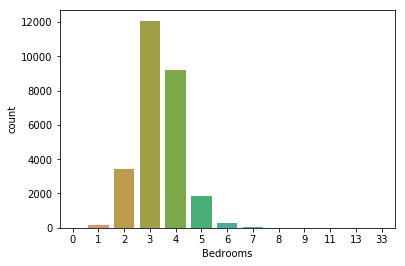

In [14]:
# quick plot
pd_sales_by_bedrooms = bedroom_sales.toPandas()
sns.barplot(x="Bedrooms", y="count",  data=pd_sales_by_bedrooms);

In [15]:
## order by count top to bottom
bedroom_sales.orderBy("Bedrooms", ascending=False).show()

+--------+-----+
|Bedrooms|count|
+--------+-----+
|      33|    1|
|      13|    1|
|      11|    3|
|       9|    5|
|       8|   10|
|       7|   41|
|       6|  275|
|       5| 1872|
|       4| 9190|
|       3|12074|
|       2| 3415|
|       1|  164|
|       0|   12|
+--------+-----+



## Step 6 : Remove Outliers
There are some outlier data.  
For example, houses with large number of bedrooms (9, 33!).   
Let's remove those.


In [16]:
## TODO : filter data that is less than or equal to 5 bedrooms
print("raw data record count ", house_prices.count())
## Hint : 5
x = house_prices.filter("Bedrooms <= 5")
print ("less than 5br records count ", x.count())
x.show()

raw data record count  27063
less than 5br records count  26727
+---+--------+---------+----------+-------------+--------+---------+-------------+-------+-------+-------+
| ID|    Date|SalePrice|PropertyID| PropertyType|Bedrooms|Bathrooms|SqFtTotLiving|SqFtLot|YrBuilt|ZipCode|
+---+--------+---------+----------+-------------+--------+---------+-------------+-------+-------+-------+
|  2| 6/16/06|  1000000|   1200013|Single Family|       4|     3.75|         3764|  20156|   2005|  98166|
|  3| 1/29/07|   745000|   1200019|Single Family|       4|     1.75|         2060|  26036|   1947|  98166|
|  4| 2/25/08|   425000|   2800016|Single Family|       5|     3.75|         3200|   8618|   1966|  98168|
|  5| 3/29/13|   240000|   2800024|Single Family|       4|     1.75|         1720|   8620|   1948|  98168|
|  6| 3/30/09|   349900|   3600090|    Townhouse|       2|      1.5|          930|   1012|   2008|  98144|
|  7| 8/28/13|   327500|   3800004|Single Family|       3|      1.5|         175

In [17]:
# do a summary on cleaned up data
x.groupBy('Bedrooms').count().orderBy('Bedrooms').show()

+--------+-----+
|Bedrooms|count|
+--------+-----+
|       0|   12|
|       1|  164|
|       2| 3415|
|       3|12074|
|       4| 9190|
|       5| 1872|
+--------+-----+



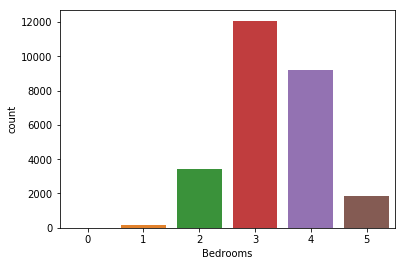

In [18]:
## visualize
pd_sales_by_bedrooms = x.groupBy('Bedrooms').count().orderBy('Bedrooms').toPandas()
sns.barplot(x="Bedrooms", y="count",  data=pd_sales_by_bedrooms);

## Step 7: Calculate some percentiles

In [19]:
import pandas as pd

percentiles = (0.25, 0.5, 0.75, 0.9, 0.95)
prices = house_prices.stat.approxQuantile("SalePrice", percentiles, 0.0)

print(percentiles)
print(prices)

# get a Pandas dataframe for pretty print
percentile_pricing_df = pd.DataFrame({"percentile": percentiles, "price": prices} )
percentile_pricing_df

(0.25, 0.5, 0.75, 0.9, 0.95)
[329000.0, 425000.0, 590000.0, 820000.0, 1050000.0]


,percentile,price
0,0.25,329000.0
1,0.50,425000.0
2,0.75,590000.0
3,0.90,820000.0
4,0.95,1050000.0


### Visualize Prices per Bedrooms

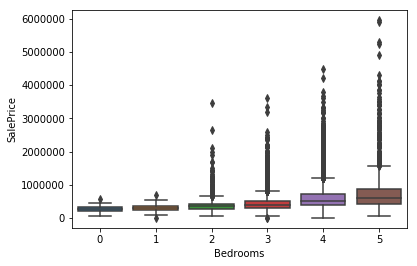

In [20]:
pd_df = x.toPandas()
# pd_df
sns.boxplot(x="Bedrooms", y="SalePrice",  data=pd_df);

### Better visualization, by removing outliers
The above graph is not looking great (kinda squished).  Let's cleanup the data by removing outliers and try again.

In [21]:
# extract 90 percentile data
ninety_percentile_data = x.filter( house_prices['SalePrice'] < prices[3])
ninety_percentile_data.count()

24108

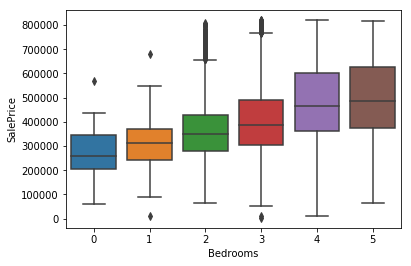

In [22]:
sns.boxplot(x="Bedrooms", y="SalePrice",  data=ninety_percentile_data.toPandas());

## Step 8: Explore Stat object in dataframe

[API for pyspark.sql.DataFrameStatFunctions](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=dataframe#pyspark.sql.DataFrameStatFunctions)


In [23]:
# hit the tab key after the dot(.)
#house_prices.stat.

## Step 9: Covariance & Correlation

Q1 : Calculate Covariance between "SalePrice"  and "Bedrooms"

Q1 : Which attributes influences sale price more?  
- Number of Bedrooms ("Bedrooms")
- or size of the home ("SqFtTotLiving")

Hint : calculate Correlation

**Q=> Can you explain the result**

In [24]:
print (house_prices.stat.cov("SalePrice", "Bedrooms"))

print(house_prices.stat.corr("SalePrice", "Bedrooms"))
print(house_prices.stat.corr("SalePrice", "SqFtTotLiving"))

98160.81100123127
0.3197646314392484
0.6825731974206252


## Bonus Lab : Find the most expensive zip codes
We have data from many zip codes.  
To find the most expensive zip code, let's first calculate  **price per sqft**

In [25]:
## Step 1 : calculate price per sqft
## TODO : do the math, divide  house_prices['SalePrice'] by  house_prices['SqFtTotLiving']
a = house_prices.withColumn("price_per_sqft", house_prices["SalePrice"] / house_prices['SqFtTotLiving'])

price_per_sqft = a.select('SalePrice', 'SqFtTotLiving', 'price_per_sqft' , 'ZipCode')
price_per_sqft.show()

+---------+-------------+------------------+-------+
|SalePrice|SqFtTotLiving|    price_per_sqft|ZipCode|
+---------+-------------+------------------+-------+
|   280000|         2400|116.66666666666667|  98002|
|  1000000|         3764| 265.6748140276302|  98166|
|   745000|         2060| 361.6504854368932|  98166|
|   425000|         3200|          132.8125|  98168|
|   240000|         1720|139.53488372093022|  98168|
|   349900|          930|376.23655913978496|  98144|
|   327500|         1750|187.14285714285714|  98178|
|   347000|         1860|186.55913978494624|  98178|
|   220400|          990|222.62626262626262|  98032|
|   437500|         1980|220.95959595959596|  98055|
|   150000|          840|178.57142857142858|  98055|
|   300000|         1750|171.42857142857142|  98118|
|   292000|          790|369.62025316455697|  98118|
|   299800|          790|379.49367088607596|  98118|
|   370000|         1530|241.83006535947712|     -1|
|   605000|         2120|285.37735849056605|  

In [26]:
## Group data by zipcode and take the avg of price_per_sqft
b  = price_per_sqft.groupBy("ZipCode").avg("price_per_sqft")
b.show()

## How many sales by zipcode
price_per_sqft.groupBy("ZipCode").count().show()

+-------+-------------------+
|ZipCode|avg(price_per_sqft)|
+-------+-------------------+
|  98002|  181.5828525214933|
|  98155| 237.84921059107273|
|  98146| 218.89232817573816|
|  98198| 191.22741747822306|
|  98122|  320.6815725211949|
|     -1|  235.3764122257653|
|  98077| 233.05769777314418|
|  98006|  268.4866402952162|
|  98001| 168.24814266664526|
|  98005| 286.50793439730745|
|  98112| 380.41852745080325|
|  98115| 299.89803001862515|
|  98059| 209.53742406143147|
|  98075| 242.95418518214333|
|  98023|  168.4872527174277|
|  98109|  352.8134904173672|
|  98136|  295.0808917119422|
|  98354| 163.41905749954958|
|  98052| 252.81048887226137|
|  98011| 215.92797902062244|
+-------+-------------------+
only showing top 20 rows

+-------+-----+
|ZipCode|count|
+-------+-----+
|  98002|  180|
|  98155|  358|
|  98146|  287|
|  98198|  225|
|  98122|  380|
|     -1| 4374|
|  98077|  204|
|  98006|  460|
|  98001|  358|
|  98005|  133|
|  98112|  357|
|  98115|  620|
|  98059|  513

In [27]:
## Now sort by avg price
b.orderBy('avg(price_per_sqft)', ascending=False).show()

+-------+-------------------+
|ZipCode|avg(price_per_sqft)|
+-------+-------------------+
|  98039| 492.26818503150423|
|  98004|  412.8363048536279|
|  98112| 380.41852745080325|
|  98102| 368.57700362843156|
|  98040| 366.69539951568635|
|  98119| 357.56526212969436|
|  98109|  352.8134904173672|
|  98105|  337.1771925707948|
|  98122|  320.6815725211949|
|  98103|  319.9441238813941|
|  98199| 319.44484048873926|
|  98033|  315.5449272890348|
|  98050|  314.0568031563766|
|  98107|  312.3686803938808|
|  98117| 311.34980205209126|
|  98116|  302.5782663533247|
|  98115| 299.89803001862515|
|  98136|  295.0808917119422|
|  98070| 291.51827563742177|
|  98068|  288.0794701986755|
+-------+-------------------+
only showing top 20 rows



## Bonus Lab 2 : Pre-Post Bubble data
The sales data we have spans the housing bubble (year 2004 - 2006) and post bubble (year 2008 +). 
You may want to separate the data into 2 segments - pre/post bubble to get better results.